In [1]:
%matplotlib qt
import os, sys
# only necessary if using without installing
sys.path.append("..")
from xmcdpy import *
from PIL import Image

c:\users\lukas\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\lukas\miniconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\lukas\miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Define the data folder and the normalisation image path

In [2]:
data_folder = r"example_xmcd_images"
norm_image_path = "example_norm.tiff"

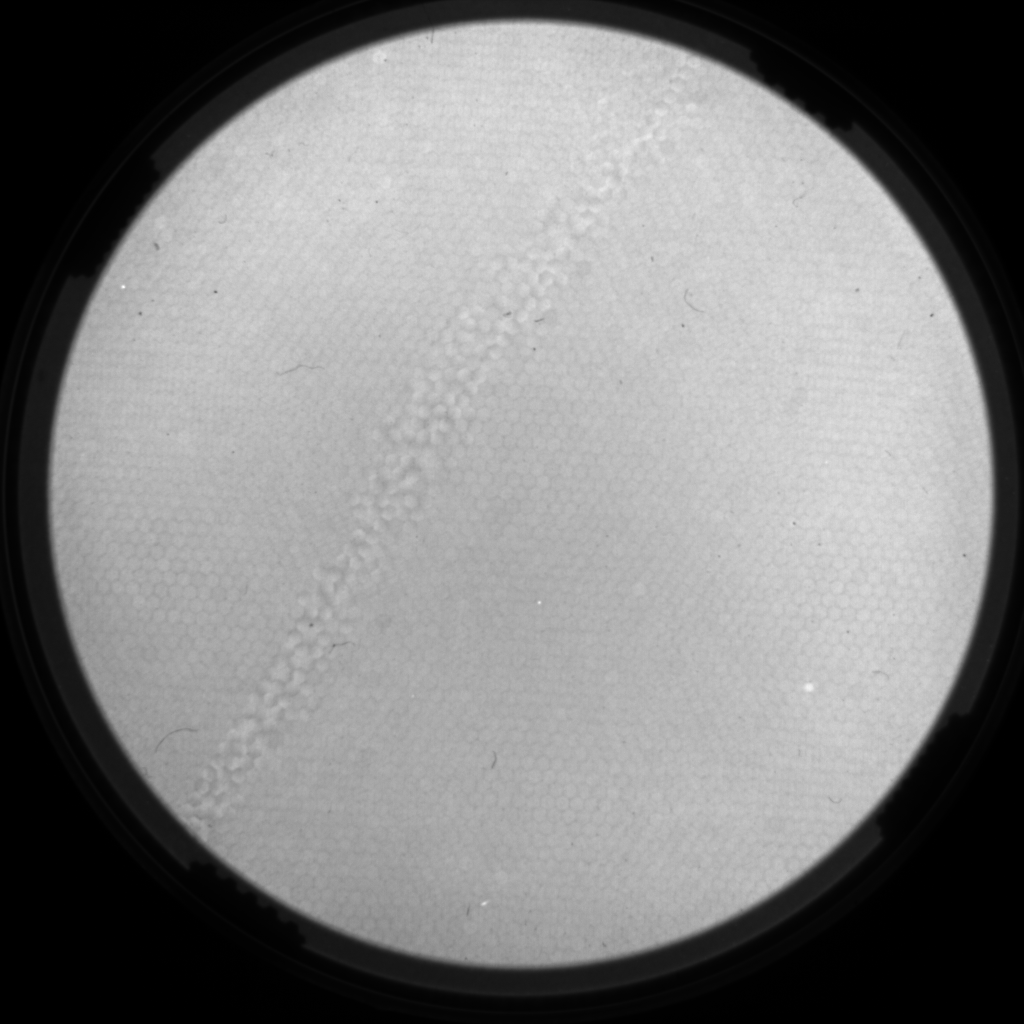

In [3]:
norm_image = read_image(norm_image_path)
# for showing in notebook, can use matplotlib otherwise
img2pil(norm_image)

### Process CL and CR stacks

#### Find the optimal masking coordinates

In [6]:
# import the stack of images
images = import_stack(data_folder, name_filter='plus')
# select the rectangle bounding the alignment region
track = show_stack(images)

229, 391
625, 596


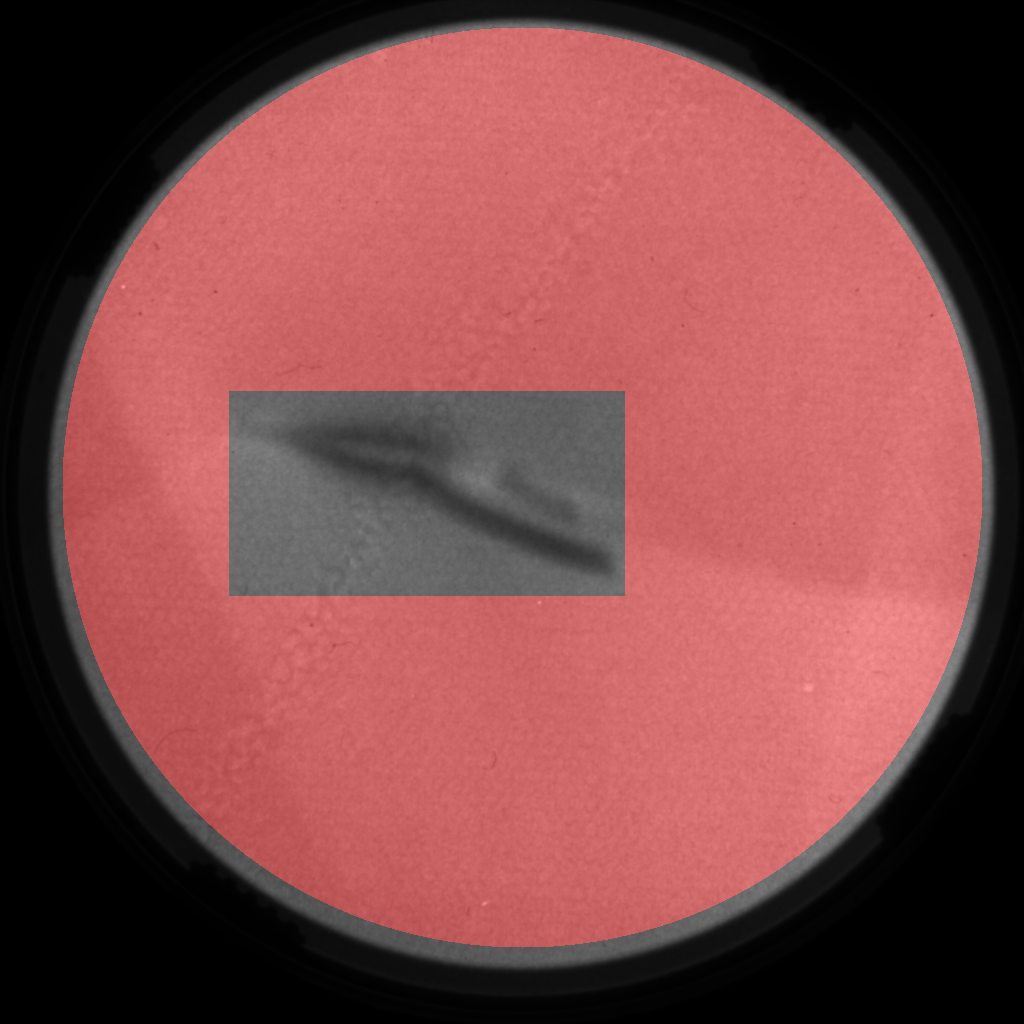

In [7]:
# rect_coord = track.get_selected_rect()
rect_coord = [229, 391, 625, 596]
background_mask = CIRCLE_MASK.copy()
background_mask[rect_coord[1]:rect_coord[3], rect_coord[0]:rect_coord[2]] = False
# show_mask(images[:,:,0], background_mask)
img2pil(add_mask(images[:,:,0], background_mask))

#### Get CL stack

In [8]:
cl_image, cl_stack = process_xmcd_folder(data_folder, 
                                        norm_image_path, 
                                        rect_coord,
                                        name_filter='min',
                                        alignment_threshold=0.25,
                                        background_mask=background_mask,
                                        show_progress = False)

Total of 0 images were dropped.
Aligning stack...
Applying shifts...
Aligned!


In [10]:
rect_in = ensure_rect_in_circle(rect_coord)
show_stack(cl_stack, rect_coord=rect_in)

#### Get CR stack

In [9]:
cr_image, cr_stack = process_xmcd_folder(data_folder, 
                                        norm_image_path, 
                                        rect_coord,
                                        name_filter='plus',
                                        alignment_threshold=0.25,
                                        background_mask=background_mask,
                                        show_progress = False)

Total of 0 images were dropped.
Aligning stack...
Applying shifts...
Aligned!


### Get XMCD

In [10]:
xmcd_stack = align_xmcd_polarisations(cl_image, cr_image,
                                   rect_coord=rect_coord,
                                   background_mask=background_mask)
show_stack(xmcd_stack)

Total of 0 images were dropped.
Aligning stack...
Applying shifts...
Aligned!


# XMCD image

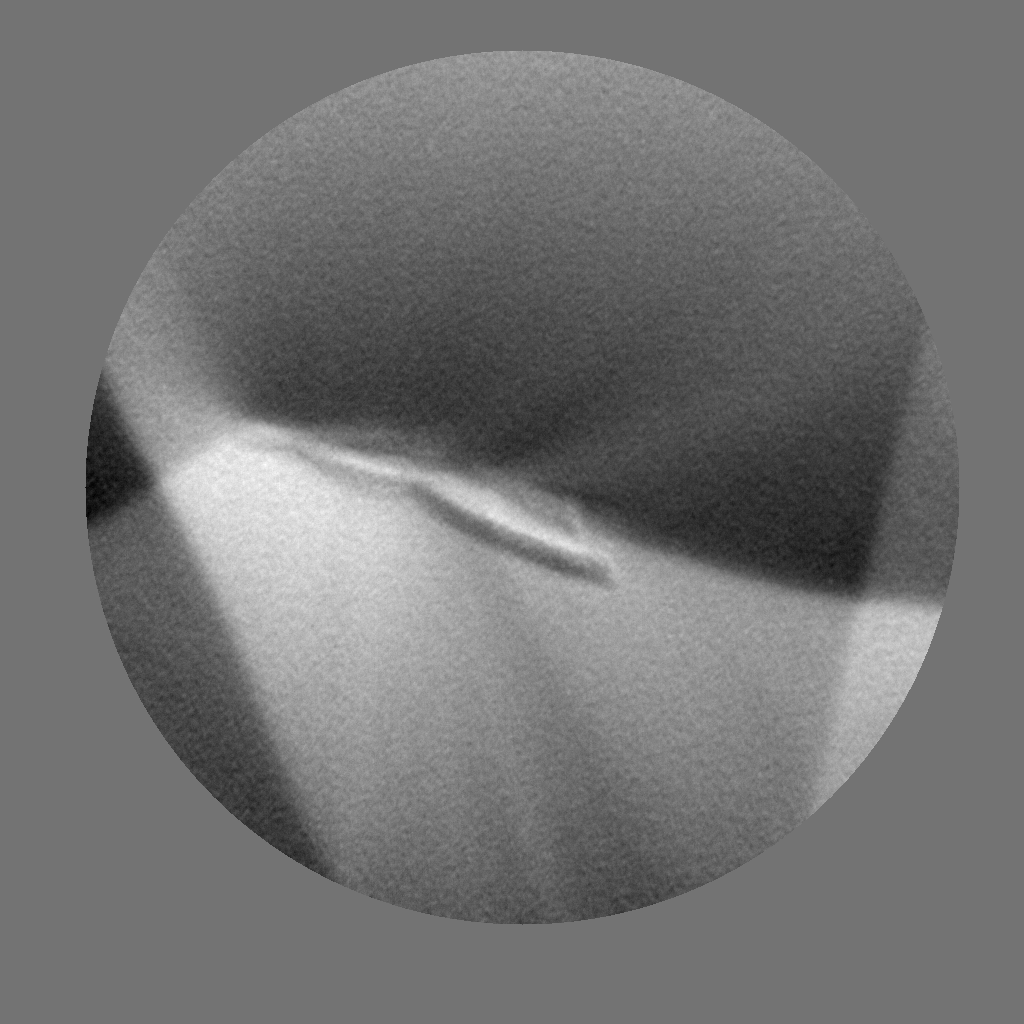

In [11]:
xmcd_image = get_xmcd_from_stack(xmcd_stack)
# get the sum as well
xmcd_sum = xmcd_stack[:,:,0]*xmcd_stack[:,:,1]
xmcd_sum[np.logical_not(CIRCLE_MASK)] = np.mean(xmcd_sum[CIRCLE_MASK])
img2pil(xmcd_image)

# Save the result

In [12]:
save_image("xmcd_image.png", xmcd_image)